In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/h-disease/heart.csv


# Main Objective

1. finding the best model to predict heart disease.
2. model is selected based on the accuracy.
3. creating a free version and a premium version.

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**The dataset is taken from UCI data repository**

In [4]:
data = pd.read_csv('../input/h-disease/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Describing the data 

\begin{align*}
\text{Variable name} & \hspace{1cm} \text{description}\\
\text{cp} & : \hspace{1cm} \text{Chest Pain Type} \\
& \hspace{1cm} \quad \text{-- Value 1: Typical Angina} \\
& \hspace{1cm} \quad \text{-- Value 2: Atypical Angina} \\
& \hspace{1cm} \quad \text{-- Value 3: Non-Anginal Pain} \\
& \hspace{1cm} \quad \text{-- Value 4: Asymptomatic} \\
\\
\text{trestbps} & : \hspace{1cm} \text{Resting Blood Pressure (mm Hg on Admission to the Hospital)} \\
\\
\text{chol} & : \hspace{1cm} \text{Serum Cholesterol (mg/dl)} \\
\\
\text{fbs} & : \hspace{1cm} \text{Fasting Blood Sugar} \\
& \hspace{1cm} \quad (1 = \text{True};\ 0 = \text{False}) \\
\\
\text{restecg} & : \hspace{1cm} \text{Resting Electrocardiographic Results} \\
& \hspace{1cm} \quad \text{-- Value 0: Normal} \\
& \hspace{1cm} \quad \text{-- Value 1: Having ST-T Wave Abnormality (T Wave Inversions and/or ST Elevation or Depression > 0.05 mV)} \\
& \hspace{1cm} \quad \text{-- Value 2: Showing Probable or Definite Left Ventricular Hypertrophy by Estes' Criteria} \\
\\
\text{thalach} & : \hspace{1cm} \text{Maximum Heart Rate Achieved} \\
\\
\text{exang} & : \hspace{1cm} \text{Exercise-Induced Angina} \\
& \hspace{1cm} \quad (1 = \text{Yes};\ 0 = \text{No}) \\
\\
\text{oldpeak} & : \hspace{1cm} \text{ST Depression Induced by Exercise Relative to Rest} \\
\\
\text{slope} & : \hspace{1cm} \text{Slope of the Peak Exercise ST Segment} \\
& \hspace{1cm} \quad \text{-- Value 1: Upsloping} \\
& \hspace{1cm} \quad \text{-- Value 2: Flat} \\
& \hspace{1cm} \quad \text{-- Value 3: Downsloping} \\
\\
\text{ca} & : \hspace{1cm} \text{Number of Major Vessels (0-3) Colored by Fluoroscopy} \\
\\
\text{thal} & : \hspace{1cm} \text{Thalassemia} \\
& \hspace{1cm} \quad 3 = \text{Normal} \\
& \hspace{1cm} \quad 6 = \text{Fixed Defect} \\
& \hspace{1cm} \quad 7 = \text{Reversible Defect} \\
\end{align*}


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are 13 features. All of them are numerical.

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null value in the dataset so we don't need to remove the null values.

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='target'>

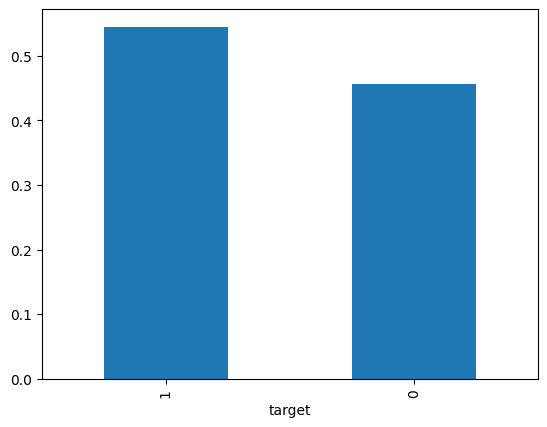

In [9]:
data.target.value_counts(normalize=True).plot(kind='bar')

The target class is balanced. So we don't need to balance the target class and we can use the classification models on the dataset to get precision and recall in balanced.


In [10]:
corr_values = data.corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

#making unused valus nans
for coord in zip(*tril_index):
    corr_values.iloc[coord[0],coord[1]] = np.NaN

In [11]:
corr_values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,NaN,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,NaN,NaN,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,NaN,NaN,NaN,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,NaN,NaN,NaN,NaN,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,NaN,NaN,NaN,NaN,NaN,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,NaN,NaN,NaN,NaN,NaN,NaN,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.577537,0.222682,0.210244,-0.430696


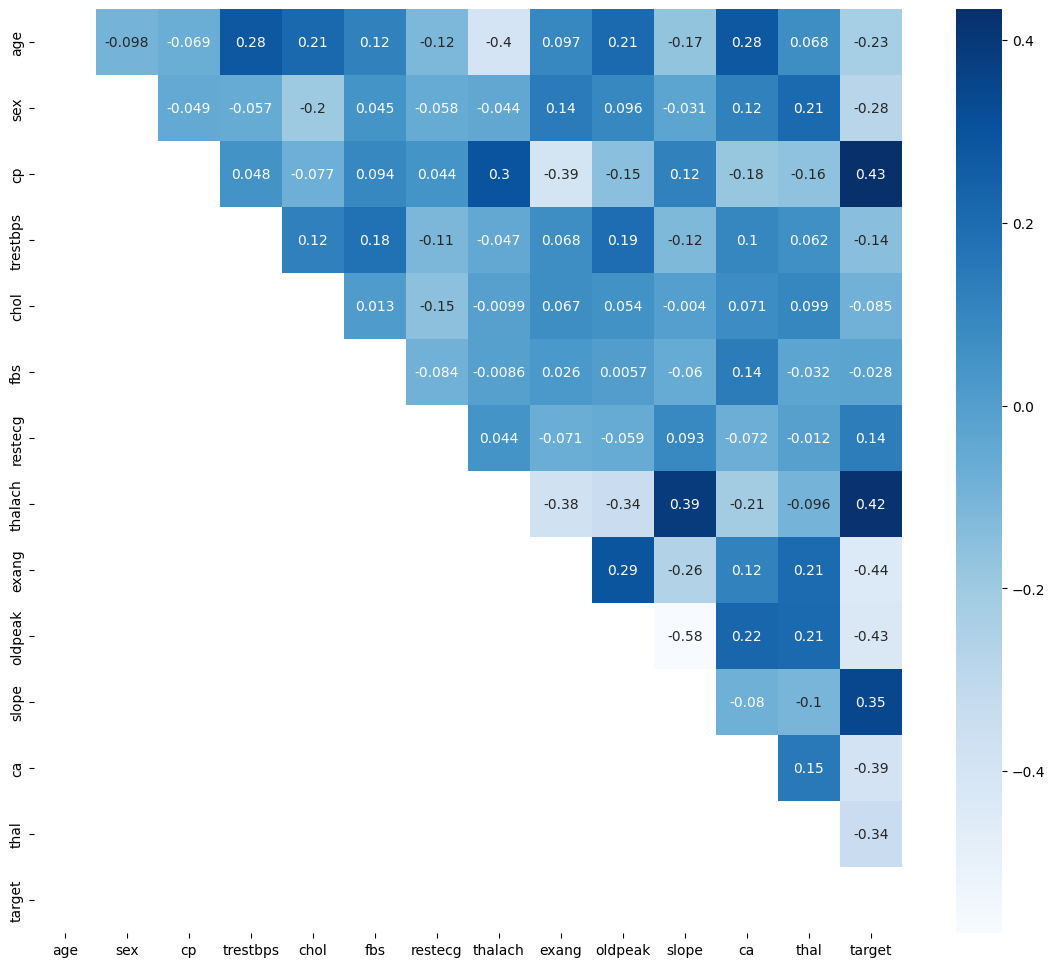

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_values,cmap='Blues',annot=True)
plt.show()

In [13]:
#sns.pairplot(data, diag_kind='kde')

In [14]:
X = data.drop('target',axis=1)
y= data['target']

**Spliting the data for training and testing**

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=2)

# Creating model

without regularization

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
model_2 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

with regularization

In [19]:
from sklearn.linear_model import LogisticRegressionCV
model_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(X_train,y_train)

In [20]:
model_l2_lbfgs = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train,y_train)


In [21]:
model_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,y_train)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [23]:
model_l2_lbfgs_std = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train_std,y_train)

Predicting and showing result

In [24]:
y_pred = list()
y_prob = list()

coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs']
coeff_models = [model, model_2, model_l1,model_l2,model_l2_lbfgs]

for lab,mod in zip(coeff_labels,coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test),name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1),name=lab))
    
y_pred.append(pd.Series(model_l2_lbfgs_std.predict(X_test_std),name='model_l2_lbfgs_std'))
y_prob.append(pd.Series(model_l2_lbfgs_std.predict_proba(X_test_std).max(axis=1),name='model_l2_lbfgs_std'))

In [25]:
coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs','model_l2_lbfgs_std']

In [26]:
y_pred=pd.concat(y_pred,axis=1)
y_prob=pd.concat(y_prob,axis=1)

In [27]:
y_pred.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,0,0,0,0,0,0


In [28]:
y_prob.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,0.986963,0.986506,0.989370,0.990814,0.953191,0.797053
1,0.921716,0.921361,0.933497,0.931686,0.915081,0.696288
2,0.594798,0.597865,0.589402,0.585726,0.608764,0.584961
3,0.734437,0.729993,0.754944,0.751528,0.700439,0.652049
4,0.972793,0.968962,0.974711,0.977058,0.939071,0.662071


In [29]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

metrics = list()
cf_mat = dict()

for lab in coeff_labels:
    precision,recall,fscore,_ = score(y_test,y_pred[lab],average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    cf_mat[lab] = confusion_matrix(y_test,y_pred[lab])
    
    metrics.append(pd.Series({'precision': precision,
                             'recall': recall,'fscore': fscore,'accuracy': accuracy},name=lab))
    
metrics= pd.concat(metrics,axis=1)

In [30]:
metrics

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
precision,0.843710,0.832064,0.832064,0.832064,0.858380,0.833047
recall,0.842105,0.828947,0.828947,0.828947,0.855263,0.828947
fscore,0.842325,0.829214,0.829214,0.829214,0.855489,0.827284
accuracy,0.842105,0.828947,0.828947,0.828947,0.855263,0.828947


<Axes: >

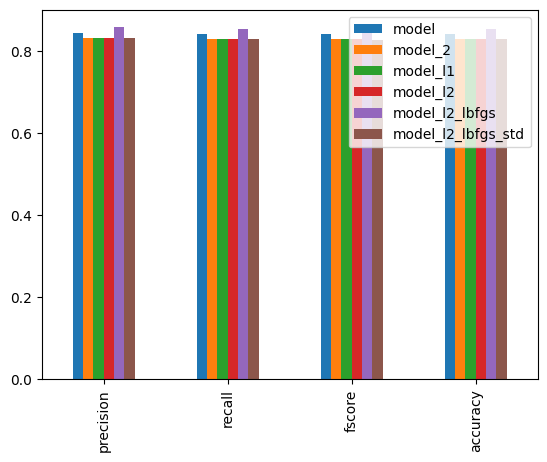

In [31]:
metrics.plot(kind='bar')

**As we see we get maximum result in model with L2 regularization where solver lbfgs**

In [32]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#changing the data to numpy array
input_data_numpy = np.asarray(input_data)
input_data = input_data_numpy.reshape(1,-1)

prediction = model_l2_lbfgs.predict(input_data)

if(prediction==0):
    print('The patient has no heart disease.')
else:
    print('The patient has heart disease.')


The patient has heart disease.


# Creating premium version

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#the parameters to be fit
param_grid = {
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'subsample': [1.0, 0.5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                          param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [15, 25, 50, 100, 200, 400],
                         'subsample': [1.0, 0.5]},
             scoring='accuracy')

In [34]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 400, 'subsample': 0.5}

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = grid_search.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        38
           1       0.78      0.84      0.81        38

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [36]:
accuracy_score(y_pred,y_test)

0.8026315789473685

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [38]:
k_param = {
    'n_neighbors': [3,5,7,9,11]
}
k_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=k_param, scoring='accuracy',
                       n_jobs=-1)
k_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [39]:
k_search.best_params_

{'n_neighbors': 7}

In [40]:
estimators = [('LR',LogisticRegressionCV(Cs=10,cv=4,penalty='l2')),('KNN',KNeighborsClassifier(n_neighbors=7)),('dt',DecisionTreeClassifier())]

In [41]:
clf = StackingClassifier( estimators=estimators, final_estimator= SVC())


In [42]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('LR', LogisticRegressionCV(cv=4)),
                               ('KNN', KNeighborsClassifier(n_neighbors=7)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [43]:
y_pred=clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.881578947368421

In [48]:
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.90      0.88      0.89        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



# Saving the model

In [45]:
import pickle

In [46]:
filename = 'heart_disease_free.pkl'
pickle.dump(model_l2_lbfgs, open(filename, 'wb'))

In [47]:
filename = 'heart_disease_premium.pkl'
pickle.dump(clf, open(filename, 'wb'))